# Develop `time_series_plots` Figure Module

Development of functions for `nowcast.figures.research.time_series_plots` web site figure module.

In [1]:
from types import SimpleNamespace

import matplotlib.pyplot as plt
import xarray as xr
import arrow as arw

from salishsea_tools import places

import nowcast.figures.website_theme

from importlib import reload

In [2]:
%matplotlib inline

What make_plots provides:

In [3]:
place = 'Sandheads'

left_variable = 'nitrate'
right_variable = 'diatoms'

xr_dataset = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV17-02')

In [4]:
xr_dataset

<xarray.Dataset>
Dimensions:                       (depth: 40, gridX: 398, gridY: 898, time: 9096)
Coordinates:
  * time                          (time) datetime64[ns] 2014-09-12T00:30:00 ...
  * depth                         (depth) float32 0.5 1.5 2.50001 3.50003 ...
  * gridY                         (gridY) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
  * gridX                         (gridX) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
Data variables:
    Fraser_tracer                 (time, depth, gridY, gridX) float64 ...
    ammonium                      (time, depth, gridY, gridX) float64 ...
    biogenic_silicon              (time, depth, gridY, gridX) float64 ...
    ciliates                      (time, depth, gridY, gridX) float64 ...
    diatoms                       (time, depth, gridY, gridX) float64 ...
    dissolved_organic_nitrogen    (time, depth, gridY, gridX) float64 ...
    flagellates                   (time, depth, gridY, gridX) float64 ...
    mesozooplankton               

## `_prep_plot_data()` Function

In [5]:
def _prep_plot_data(xr_dataset, left_variable, right_variable, place):

    end_day = arw.get(xr_dataset.time_coverage_end)
    start_day = end_day.replace(days=-1)
    time_slice = slice(start_day.date(), end_day.replace(days=+1).date())
    gridY, gridX = places.PLACES[place]['NEMO grid ji']

    left = xr_dataset[left_variable].sel(time=time_slice).isel(depth=0, gridX=gridX, gridY=gridY)
    
    right = xr_dataset[right_variable].sel(time=time_slice).isel(depth=0, gridX=gridX, gridY=gridY)
    
    left_long_name = xr_dataset[left_variable].long_name
    left_units = xr_dataset[left_variable].units
    
    right_long_name = xr_dataset[right_variable].long_name
    right_units = xr_dataset[right_variable].units
    

    return SimpleNamespace(left=left, right=right, left_long_name=left_long_name, left_units=left_units,
                           right_long_name=right_long_name, right_units=right_units)

## `_prep_fig_axes() Function`

In [6]:
def _prep_fig_axes(figsize, theme):
    fig, axl = plt.subplots(
        figsize=figsize, facecolor=theme.COLOURS['figure']['facecolor'])

    axl.set_axis_bgcolor(theme.COLOURS['axes']['background'])
    axr = axl.twinx()
    axr.set_axis_bgcolor(theme.COLOURS['axes']['background'])
    
    return fig, axl, axr

## `_plot_timeseries()` Function

In [7]:
def _plot_timeseries(ax, plot_data, variable, theme):
    ax.plot(plot_data.time, plot_data, color=theme.COLOURS['time series'][variable])
    return

## `_timeseries_axes_labels()` Function

In [8]:
def _timeseries_axes_labels(axl, axr, left_variable, left_long_name, left_units, 
                            right_variable, right_long_name, right_units, theme):
    axl.set_xlabel(
        'Date',
        color=theme.COLOURS['text']['axis'],
        fontproperties=theme.FONTS['axis'])
    axl.set_ylabel(left_long_name+' ['+left_units+']', fontproperties=theme.FONTS['axis'])
    theme.set_axis_colors(axl)
    axr.set_ylabel(right_long_name+' ['+right_units+']', fontproperties=theme.FONTS['axis']
                   ,rotation=-90, verticalalignment='bottom')
    theme.set_axis_colors(axr)

    axl.text(
        0.5,
        0.95,
        left_long_name,
        horizontalalignment='center',
        color=theme.COLOURS['time series'][left_variable],
        fontproperties=theme.FONTS['legend label large'],
        transform=axl.transAxes)
    axl.text(
        0.5,
        0.9,
        right_long_name,
        horizontalalignment='center',
        color=theme.COLOURS['time series'][right_variable],
        fontproperties=theme.FONTS['legend label large'],
        transform=axl.transAxes)
    
    axl.grid(axis='x')

## `make_figure()` Function

This is is the function that will be called by the `nowcast.workers.make_plots` worker to return a `matplotlib.figure.Figure` object.

In [9]:
def make_figure(xr_dataset,
                left_variable,
                right_variable,
                place,
                figsize=(20, 8),
                theme=nowcast.figures.website_theme):
    plot_data = _prep_plot_data(xr_dataset, left_variable, right_variable, place)

    fig, axl, axr = _prep_fig_axes(figsize, theme)
    _plot_timeseries(axl, plot_data.left, left_variable, theme)
    _plot_timeseries(axr, plot_data.right, right_variable, theme)
    _timeseries_axes_labels(axl, axr, left_variable, plot_data.left_long_name, plot_data.left_units, 
                            right_variable, plot_data.right_long_name, plot_data.right_units, theme)

    return fig

## Render the Figure


### Nitrate - diatoms

20.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


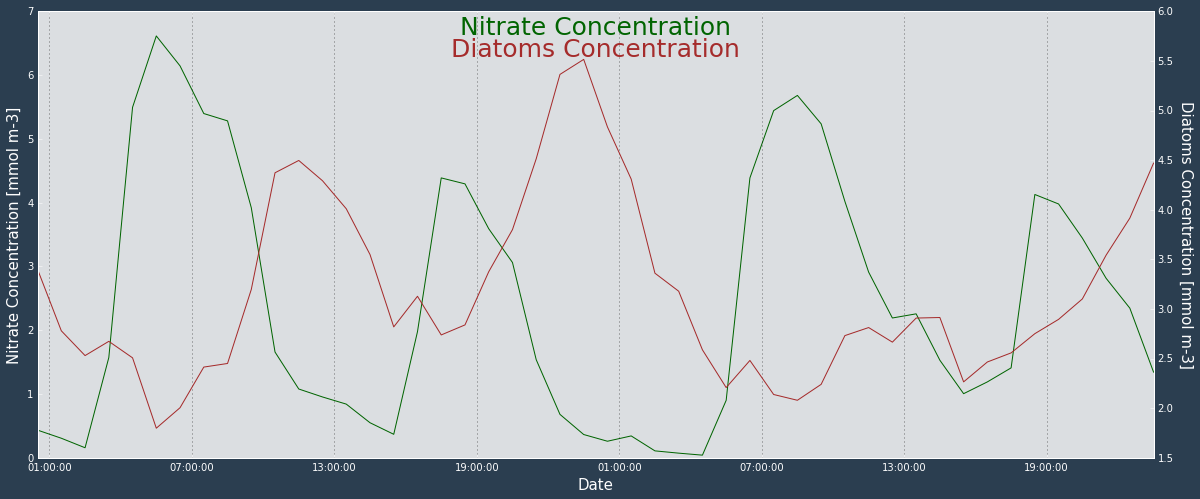

In [10]:
%%timeit -n1 -r1
reload(nowcast.figures.website_theme) # to reload website theme colours etc
fig = make_figure(xr_dataset, left_variable, right_variable, place)

### Mesozoo - microzoo

In [35]:
left_variable = 'mesozooplankton'
right_variable = 'microzooplankton'

44.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


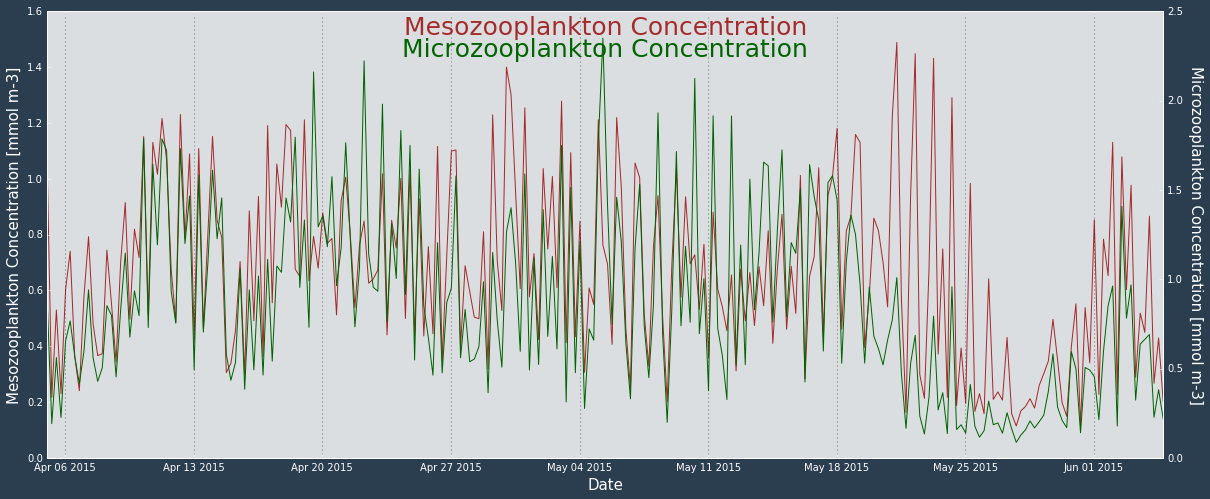

In [36]:
%%timeit -n1 -r1
reload(nowcast.figures.website_theme) # to reload website theme colours etc
fig = make_figure(xr_dataset, left_variable, right_variable, place)

### Mesodinium - flagellaes

In [43]:
left_variable = 'ciliates'
right_variable = 'flagellates'

7.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


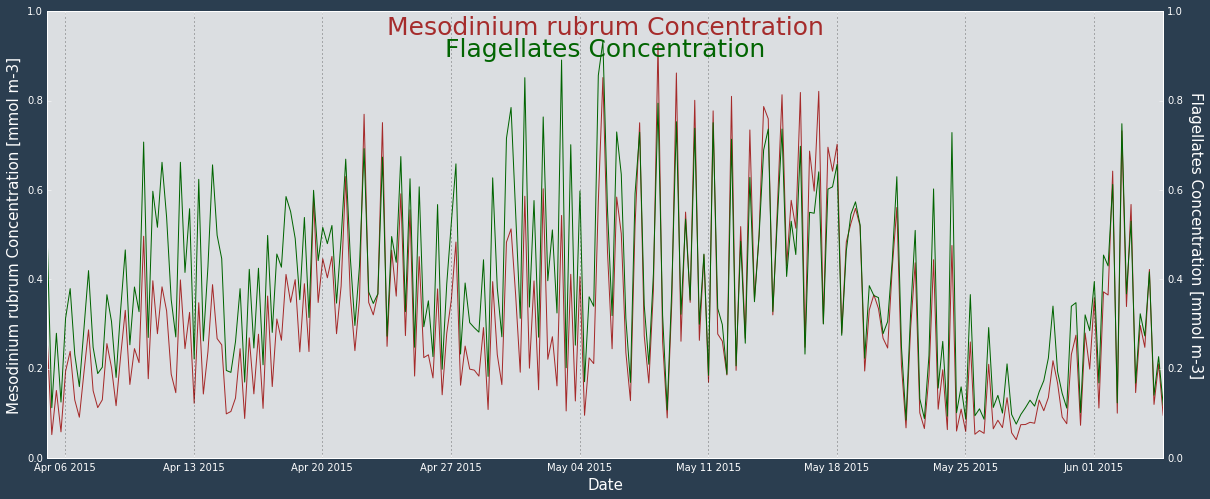

In [46]:
%%timeit -n1 -r1
reload(nowcast.figures.website_theme) # to reload website theme colours etc
fig = make_figure(xr_dataset, left_variable, right_variable, place)

### Temperature - salinity

In [11]:
xr_dataset = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')
left_variable = 'temperature'
right_variable = 'salinity'

46.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


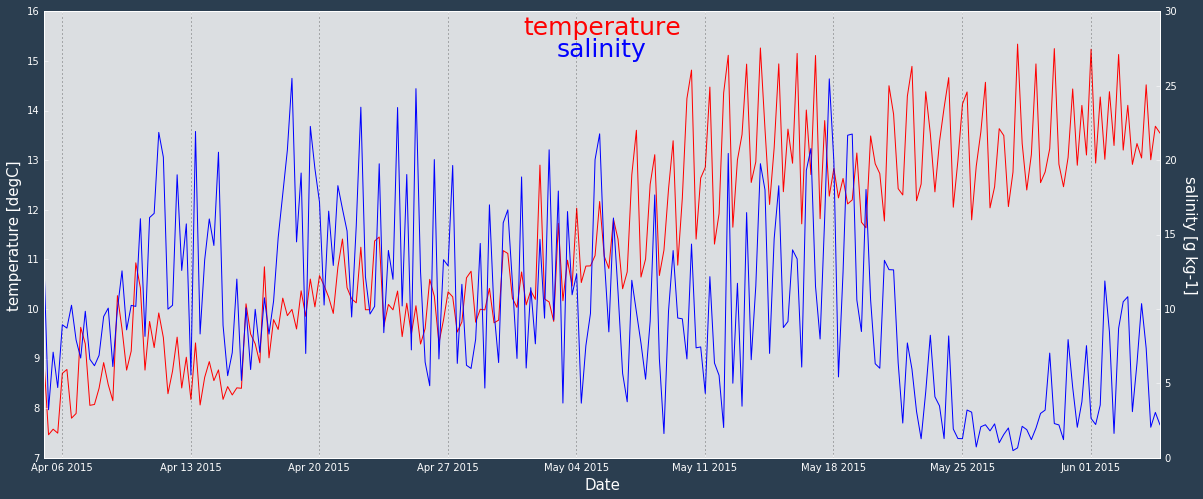

In [40]:
%%timeit -n1 -r1
reload(nowcast.figures.website_theme) # to reload website theme colours etc
fig = make_figure(xr_dataset, left_variable, right_variable, place)